# OpenScope's Illusion Dataset

Imagine being out in the open sea on a boat. Suddenly, you notice a dark shape passing by underwater. Even though the shape is distorted by the wave and the color is a mere shade different from the water, you mind automatically infers the outline of a shark. As illustrated, perception is inference rather than faithful reconstruction. However sensory neuroscience has traditionally focused on the question of how faithfully/accurately the brain can represent sensory information. Moreover, sensory stimuli typically used in neurophysiology experiments make it difficult to dissociate between a neural representation that is faithful vs inferred. Illusions arise due to rational mistakes in perceptual inference, exemplifying the dichotomy between faithful representation and inferred representation. Openscope's Illusion Experiment, utilizes illusory contours (ICs) to study the neural mechanisms of perceptual inference.

ICs have direct neural substrates in the brain – there are neurons in the visual cortex that respond to ICs with the same specificity as to real edges (IC-encoders). Prior literature has shown IC-encoding in primary visual cortex (V1) arises through top-down feedback from higher visual areas (Figure 1). IC perception requires precise alignment of inducers (e.g., black circular shapes on either side of the illusory contour): Rotating one of the inducers no longer evokes an illusory percept (rotated control images, RCs). It follows that inducer-encoders, i.e., neurons that receive feedforward sensory information from inducers on either side of the IC, need to coordinate their sensory driven activity to drive IC-encoders in higher visual areas, and in turn, V1. In other words, IC-encoders need to bind with inducer-encoders on both sides of the IC. On the contrary, the binding of faithful neurons, i.e., neurons that respond to real edges but not to illusory contours, is inconsequential for IC perception. Therefore, ICs necessitate a much more selective group of neurons to bind compared to real edges, narrowing down the spatial component of the binding problem. Thus, ICs are ideally suited for addressing the temporal component of the binding problem.

![illusion_fig1.png](../../data/images/illusion_fig1.png)

### Environment Setup
⚠️**Note: If running on a new environment, run this cell once and then restart the kernel**⚠️

In [1]:
try:
    from dandi_utils import dandi_download_open
except:
    !git clone https://github.com/AllenInstitute/openscope_databook.git
    %cd openscope_databook
    %pip install -e .

c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from ccfwidget import CCFWidget
from math import floor, ceil, isclose
from PIL import Image

### The Experiment
As shown in the metadata table below, Openscope's Illusion Experiment has produced 40 different files on the [DANDI Archive](http://dandiarchive.org), 14 subjects. There are no wildtype mice but there are Pvalb and Sst genotypes. This table was generated from [Getting Experimental Metadata from DANDI](../basics/get_dandiset_metadata.ipynb).

In [3]:
session_files = pd.read_csv("../../data/illusion_sessions.csv")
session_files

,identifier,size,path,session time,sub name,sub sex,sub age,sub genotype,probes,stim types,# units,session length
0,dbc426a0-aafa-460b-a25a-a86bb31b9ddc,2242666496,sub_1175512783/sub_1175512783sess_1187930705/s...,2022-06-29 00:00:00-07:00,619296,M,154.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeD', 'probeC', 'probeE', 'probeB', 'prob...","{'ICkcfg0_presentations', 'ICwcfg1_presentatio...",1918,7278.157990
1,181b7651-5f5c-491b-be70-e5d0354439d4,2803525629,sub_1172968426/sub_1172968426sess_1182865981/s...,2022-06-08 00:00:00-07:00,625545,M,89.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeD', 'probeC', 'probeE', 'probeB', 'prob...","{'ICkcfg0_presentations', 'ICwcfg1_presentatio...",2793,7279.234305
2,85bfd56c-f104-4c83-937c-be0d58fce48e,2372313526,sub_1172969394/sub_1172969394sess_1183070926/s...,2022-06-09 00:00:00-07:00,625555,F,90.0,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeD', 'probeC', 'probeE', 'probeB', 'prob...","{'ICkcfg0_presentations', 'ICwcfg1_presentatio...",2621,7278.592876
3,c5e97840-4988-4da8-9f57-a24fb0a4a865,2466318464,sub_1181585608/sub_1181585608sess_1194644312/s...,2022-07-27 00:00:00-07:00,630507,F,99.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeD', 'probeC', 'probeE', 'probeB', 'prob...","{'ICkcfg0_presentations', 'ICwcfg1_presentatio...",2464,7278.964870
4,a7ff352c-0b00-47d6-a49f-97027d18264e,2809532134,sub_1176214862/sub_1176214862sess_1188137866/s...,2022-06-30 00:00:00-07:00,620333,M,148.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeD', 'probeC', 'probeE', 'probeB', 'prob...","{'ICkcfg0_presentations', 'ICwcfg1_presentatio...",2593,7283.108060
5,a8bc8aaf-ccba-4c27-bb5c-f1bc3c232c84,3393216313,sub_1174569641/sub_1174569641sess_1184671550/s...,2022-06-01 00:00:00-07:00,625554,M,82.0,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeD', 'probeC', 'probeE', 'probeB', 'prob...","{'ICkcfg0_presentations', 'ICwcfg1_presentatio...",2930,7315.456085
6,32af00b4-4aa6-48de-8210-26a5cf7935a9,3556822422,sub_1181314060/sub_1181314060sess_1191383105/s...,2022-07-13 00:00:00-07:00,630502,M,85.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeD', 'probeC', 'probeE', 'probeB', 'prob...","{'ICkcfg0_presentations', 'ICwcfg1_presentatio...",2368,7277.548360
7,016e7321-807f-4b59-be42-c33511f8f55c,2491393884,sub_1177693342/sub_1177693342sess_1189887297/s...,2022-07-06 00:00:00-07:00,620334,M,154.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeD', 'probeC', 'probeE', 'probeB', 'prob...","{'ICkcfg0_presentations', 'ICwcfg1_presentatio...",2092,7279.915735
8,7252ab67-7acd-4cb7-b7a6-600df600d8e7,3393216313,sub_1171903433/sub_1171903433sess_1181330601/s...,2022-06-01 00:00:00-07:00,625554,M,82.0,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeD', 'probeC', 'probeE', 'probeB', 'prob...","{'ICkcfg0_presentations', 'ICwcfg1_presentatio...",2930,7315.456085
9,3c6a7667-5f5d-432f-829c-e915dab15c27,2483160990,sub_1182593231/sub_1182593231sess_1192952695/s...,2022-07-20 00:00:00-07:00,630506,F,92.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeD', 'probeC', 'probeE', 'probeB', 'prob...","{'ICkcfg0_presentations', 'ICwcfg1_presentatio...",2517,7279.167735


In [4]:
m_count = len(session_files["sub sex"][session_files["sub sex"] == "M"])
f_count = len(session_files["sub sex"][session_files["sub sex"] == "F"])
sst_count = len(session_files[session_files["sub genotype"].str.count("Sst") >= 1])
pval_count = len(session_files[session_files["sub genotype"].str.count("Pval") >= 1])
wt_count = len(session_files[session_files["sub genotype"].str.count("wt/wt") >= 1])
total_gb = session_files["size"].sum() // 2**9

print("Dandiset Overview:")
print(len(session_files), "files")
print(len(set(session_files["sub name"])), "subjects", m_count, "males,", f_count, "females")
print(sst_count, "sst,", pval_count, "pval,", wt_count, "wt")
# print(total_gb, "GigaBytes")

Dandiset Overview:
40 files
14 subjects 20 males, 20 females
30 sst, 10 pval, 0 wt


### Downloading Ecephys File

In [5]:
dandiset_id = "000248"
dandi_filepath = "sub-619296/sub-619296_ses-1187930705_ogen.nwb"
download_loc = "."
dandi_api_key = os.environ["DANDI_API_KEY"]

In [6]:
# This can sometimes take a while depending on the size of the file
io = dandi_download_open(dandiset_id, dandi_filepath, download_loc, dandi_api_key=dandi_api_key)
nwb = io.read()

A newer version (0.59.0) of dandi/dandi-cli is available. You are using 0.55.1


File already exists
Opening file


Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.5.0 is already loaded.
Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.


### Showing Stim Templates
The experiment consists of 118 unique stimulus frames which are shown throughout the duration in various phases. The groups below display the different sets of templates. There are four sets of Illusory Contour (IC) templates, that are either black or white, and are either arranged at 0 or 45 degrees on the screen. It can be seen that there are some images that show real contours and some that show illusory contours, as well as images whose IC encoders are orthogonal, showing no illusory contour. Additionally, there are Receptive Field and Size Templates which will be used identify neurons active in the relevant fields of the stim.

In [7]:
print(nwb.stimulus_template.keys())

dict_keys(['ICkcfg0_presentations', 'ICkcfg1_presentations', 'ICwcfg0_presentations', 'ICwcfg1_presentations', 'RFCI_presentations', 'sizeCI_presentations'])


In [8]:
def show_images(images, n_cols=10):
    n_rows = (len(images) // n_cols) + 1
    fig, axes = plt.subplots(n_rows, n_cols)
    fig.set_size_inches(2*n_cols, 2*n_rows) # can tweak these if sizing/spacing needs improvement

    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 0.5

    if len(axes.shape) == 1:
        axes = axes.reshape((1, axes.shape[0]))

    for i, template_name in enumerate(images):
        img = images[template_name]
        
        ax_row = int(i / n_cols)
        ax_col = i % n_cols
        axes[ax_row][ax_col].imshow(img, cmap="gray")
        axes[ax_row][ax_col].set_title(template_name, fontsize=8)

    remainder = (n_cols * n_rows) % len(images)
    remaining_axes = axes[-1][-remainder:]
    for ax in remaining_axes:
        ax.axis("off")

    for ax in axes.flat:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

    fig.tight_layout()

118 templates


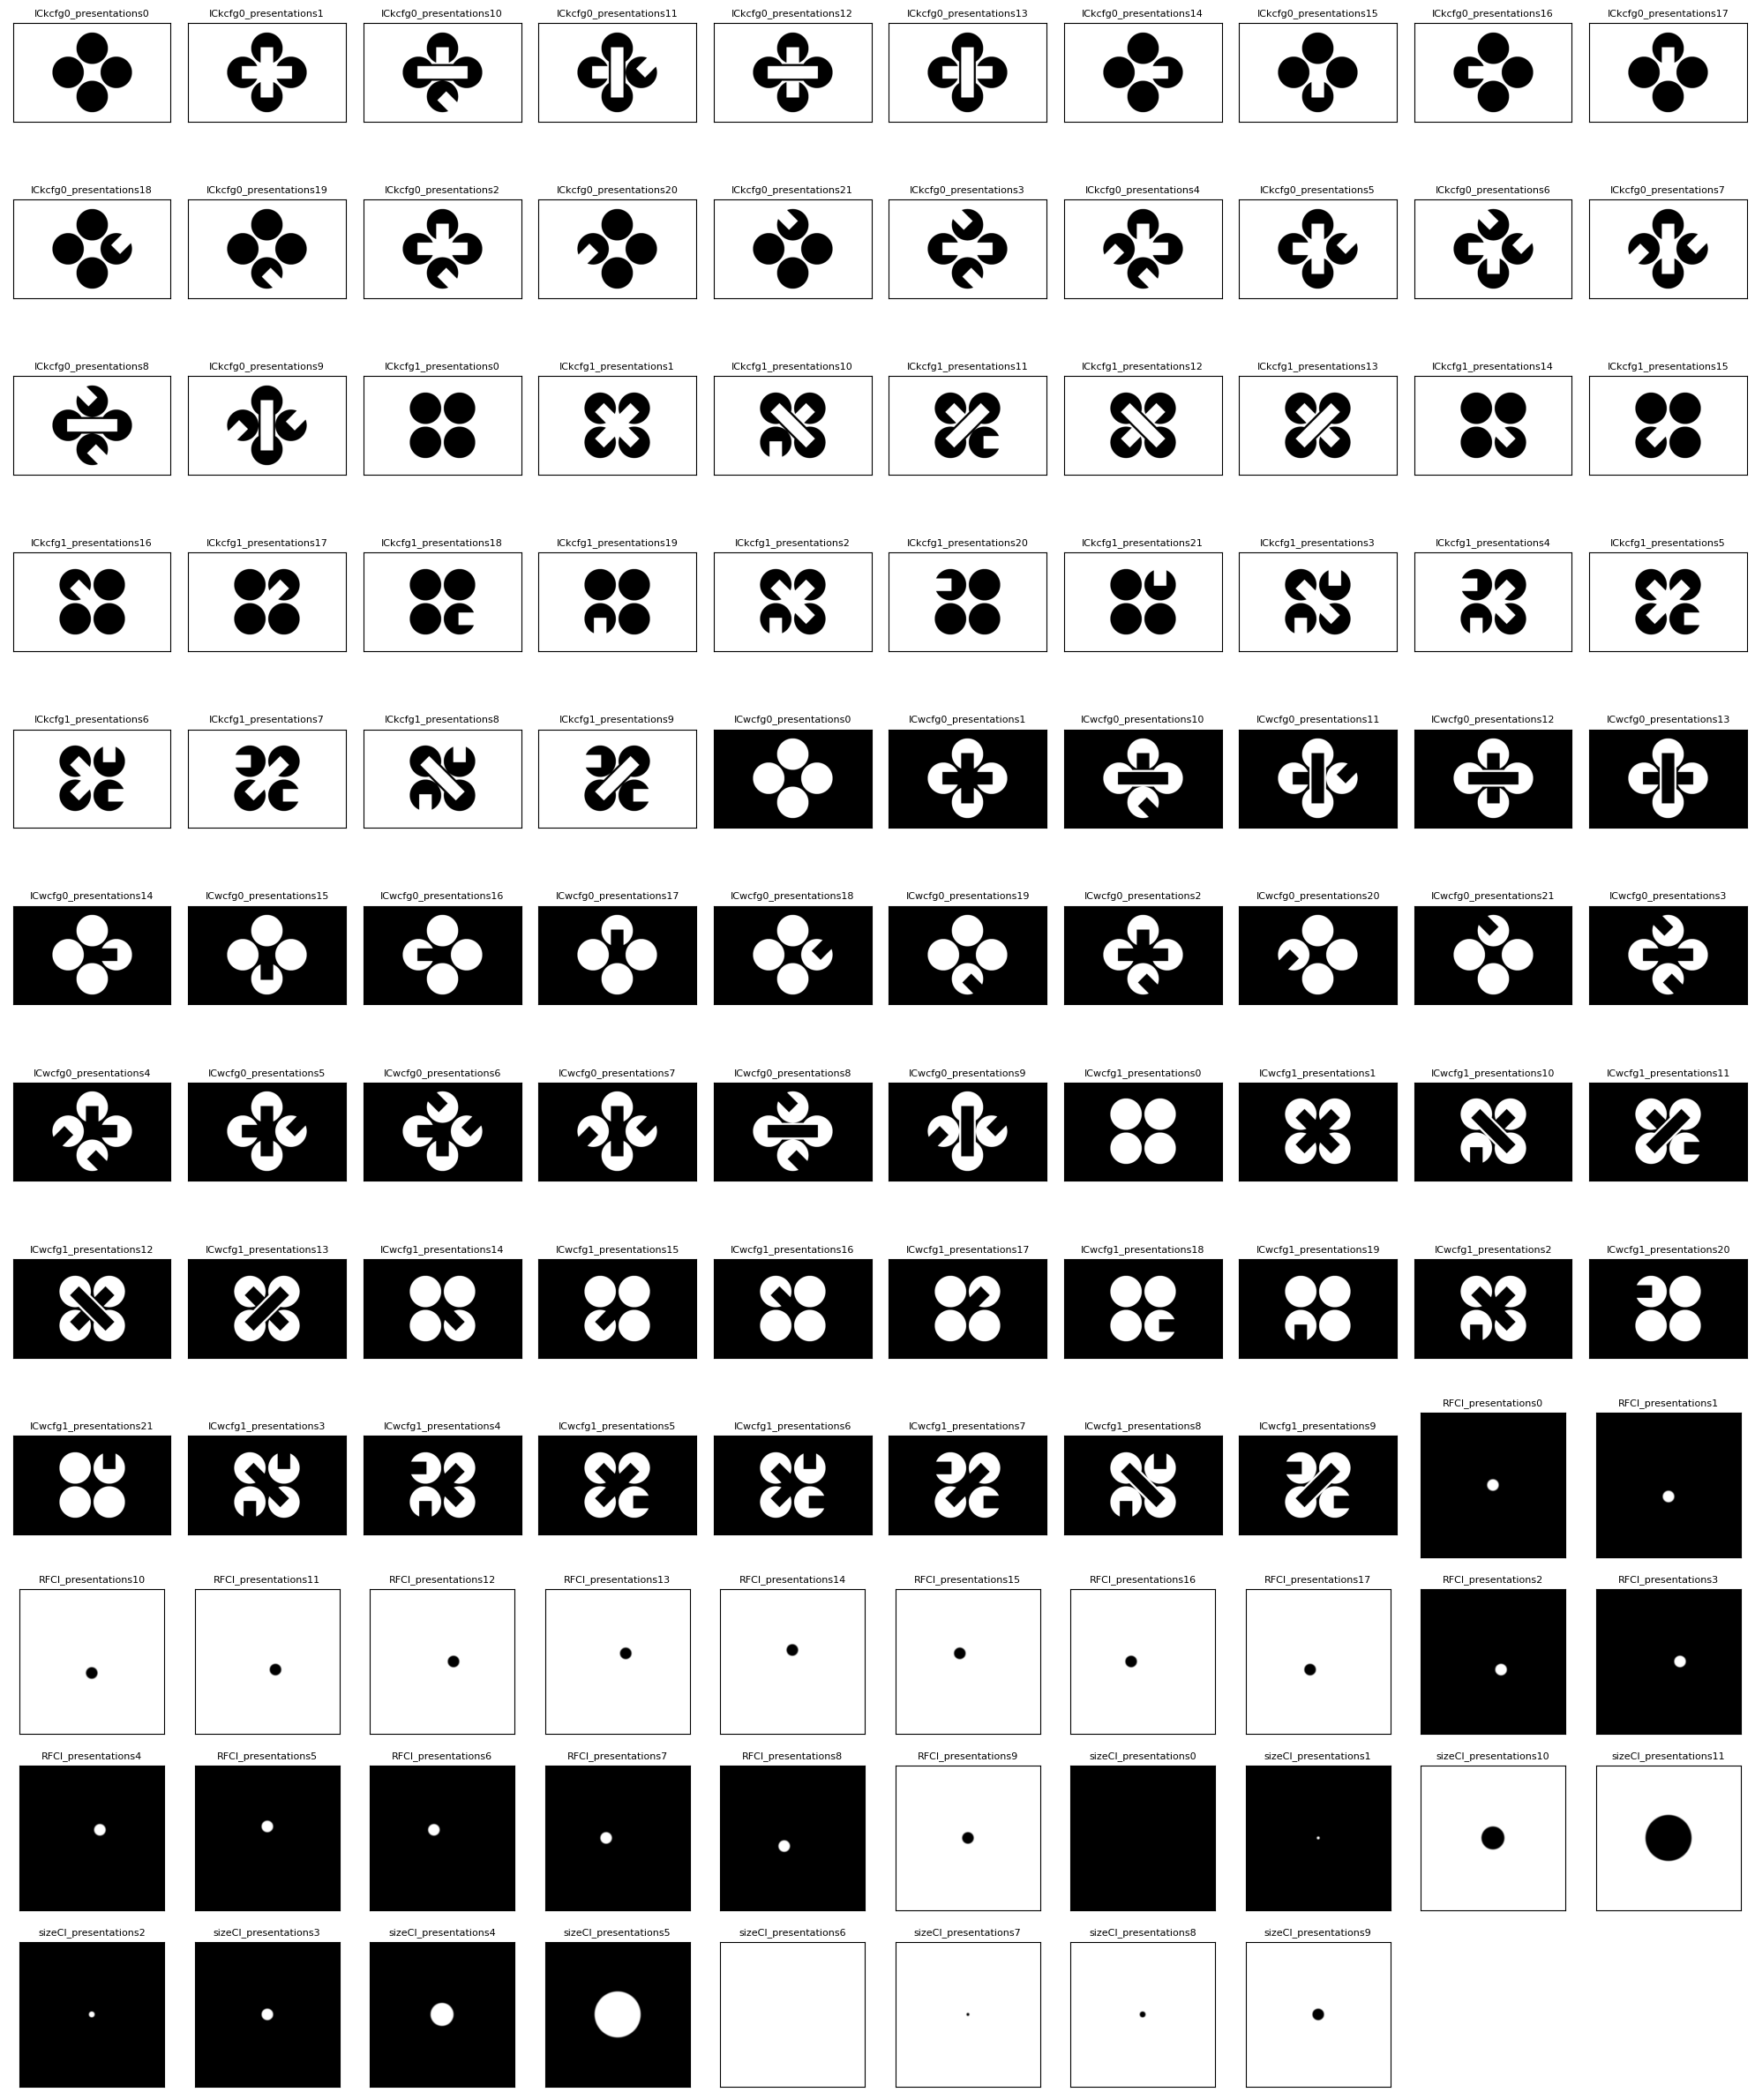

In [9]:
all_template_imgs = {}
for template_group in nwb.stimulus_template.keys():
    all_template_imgs |= nwb.stimulus_template[template_group].images

print(len(all_template_imgs), "templates")
show_images(all_template_imgs)

### Showing Probe Tracks
The images below were rendered using the [Visualizing Neuropixel Probe Locations](../visualization/visualize_neuropixel_probes.ipynb) notebook. The probes are using the [Common Coordinate Framework](https://community.brain-map.org/t/allen-mouse-ccf-accessing-and-using-related-data-and-tools/359) (CCF). The experiment uses six probes labeled A-F to target various regions.

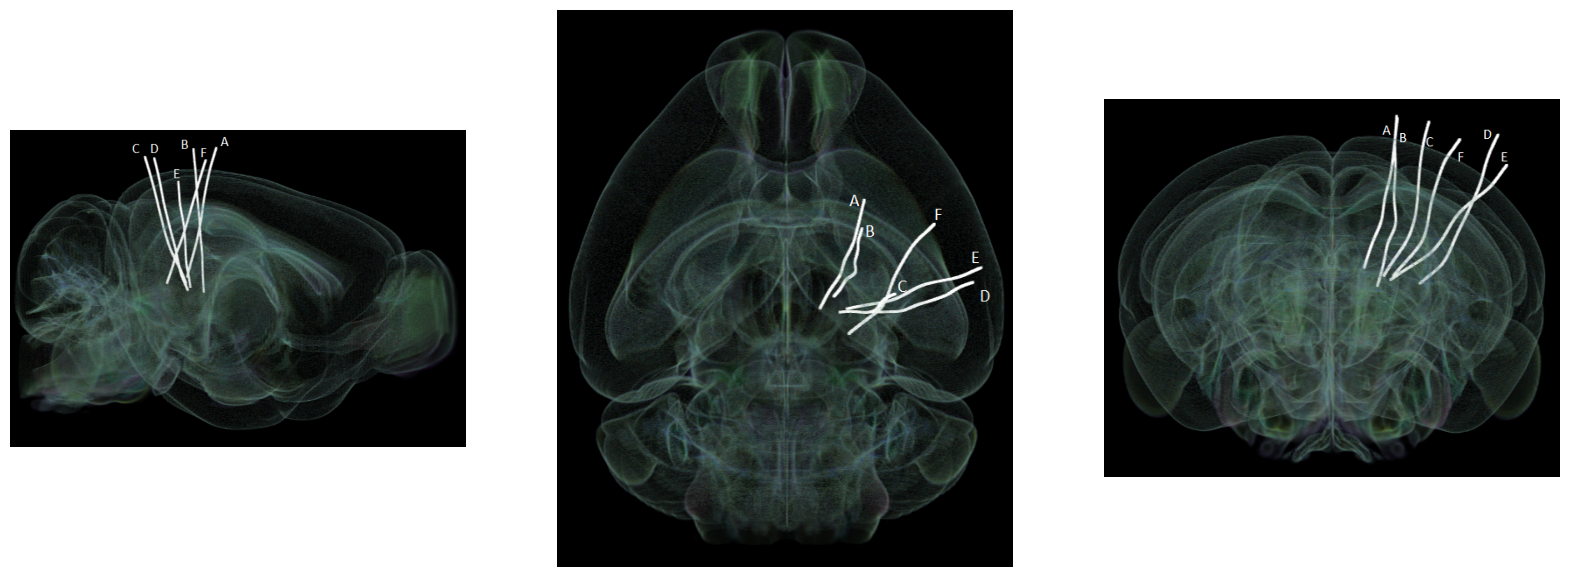

In [10]:
sagittal_view = Image.open("../../data/images/probes_sagittal.png")
dorsal_view = Image.open("../../data/images/probes_dorsal.png")
transverse_view = Image.open("../../data/images/probes_transverse.png")
fig, axes = plt.subplots(1,3,figsize=(20,60))

axes[0].imshow(sagittal_view)
axes[1].imshow(dorsal_view)
axes[2].imshow(transverse_view)
for ax in axes:
    ax.axis("off")

### Extracting Units Spikes
Below, the `Units` table is retrived from the file. It contains many metrics for every putative neuronal unit, printed below. For the analysis in this notebook, we are only interested in the `spike_times` attribute. This is an array of timestamps that a spike is measured for each unit. For more information on the various unit metrics, see [Visualizing Unit Quality Metrics](../visualization/visualize_unit_metrics.ipynb). From this table, the Units used in this notebook are selected if they have 'good' quality rather than 'noise', and if they belong in one of the regions of the primary visual cortex.

In [11]:
units = nwb.units
units[:10]

,firing_rate,local_index,snr,velocity_below,waveform_duration,presence_ratio,waveform_halfwidth,peak_channel_id,spread,max_drift,...,amplitude,nn_miss_rate,silhouette_score,amplitude_cutoff,velocity_above,l_ratio,cluster_id,spike_times,spike_amplitudes,waveform_mean
id,,,,,,,,,,,,,,,,,,,,,
18,4.137139,0,2.116110,-1.000000,0.384590,0.99,0.247236,0,80.0,66.04,...,143.934960,0.001627,-1.000000,0.500000,-0.122637,0.006565,0,"[4.7332593021199845, 4.784059251455301, 5.1438...","[0.00022612547801196482, 0.0002605381221725757...","[[0.0, -3.106154999999955, -5.142150000000001,..."
19,11.855269,1,2.552982,-1.000000,0.192295,0.96,0.096147,2,20.0,66.53,...,285.652770,0.016927,0.235680,0.070559,-0.686767,0.044741,1,"[4.610126091591993, 4.78682591536267, 5.139492...","[0.0002717232077759437, 0.000266413817618171, ...","[[0.0, -0.01794000000000029, -1.05845999999999..."
20,12.440536,2,2.612185,-1.000000,0.233501,0.99,0.137353,2,40.0,20.54,...,280.858890,0.037965,0.051058,0.123207,-0.068677,0.058302,2,"[4.893292475846266, 4.9366590992617825, 4.9734...","[0.0002728497196607883, 0.0003273993088592084,...","[[0.0, -0.6686549999999936, -2.54982, -2.66837..."
21,31.397096,3,2.715120,-1.000000,0.233501,0.99,0.137353,2,50.0,31.53,...,300.492855,0.061174,0.050260,0.015840,0.000000,0.024053,3,"[4.630126071645267, 4.643892724581938, 4.68839...","[0.00030010891438680005, 0.0004100397619250516...","[[0.0, -0.2275649999999949, -0.045239999999997..."
22,0.345068,4,3.576198,-0.686767,0.219765,0.99,0.164824,3,50.0,27.25,...,397.216755,0.000100,0.202369,0.016985,0.206030,0.001043,4,"[5.770624934183227, 6.467924238740632, 6.51309...","[0.00039629283601082753, 0.0003826880961903236...","[[0.0, -0.5664750000000023, 0.2911350000000023..."
23,0.082781,5,0.525979,-1.000000,0.837856,0.15,1.826801,5,10.0,15.38,...,381.388201,0.000100,0.135697,0.361124,-1.000000,0.006763,5,"[4696.201980325441, 4696.202446991642, 4696.20...","[0.0001721389517572803, 0.00018526815213350966...","[[0.0, -1.1973315363881405, -1.897439353099730..."
24,0.023429,6,0.722708,-1.000000,1.813065,0.13,0.975209,5,10.0,22.00,...,534.363143,0.000000,-1.000000,0.176125,-1.000000,0.001556,6,"[4699.904343299603, 4711.715231520164, 4736.45...","[0.0007057724505503196, 0.0006133575067701925,...","[[0.0, -2.2787142857142872, -4.559285714285712..."
25,0.044626,7,0.487916,-1.000000,1.950419,0.14,0.837856,5,10.0,25.39,...,330.844800,0.000300,-1.000000,0.149982,-1.000000,0.000210,7,"[4696.229180298314, 4702.916440295527, 4711.71...","[0.00018730458274066508, 0.0001915080650544062...","[[0.0, -0.9940125000000022, -3.353025000000001..."
26,4.882389,8,1.407252,-1.000000,0.329648,0.99,0.192295,2,90.0,42.33,...,199.166565,0.005176,0.088817,0.500000,-0.194584,0.114634,8,"[4.664526037336898, 4.6806926878799615, 4.6917...","[0.00020275244379736485, 0.0001811567686139792...","[[0.0, -0.22034999999999094, -0.61288499999999..."


In [12]:
### use the electrodes table to devise a function which maps units to their brain regions

# select electrodes
channel_probes = {}

electrodes = nwb.electrodes
for i in range(len(electrodes)):
    channel_id = electrodes["id"][i]
    location = electrodes["location"][i]
    channel_probes[channel_id] = location

# function aligns location information from electrodes table with channel id from the units table
def get_unit_location(row):
    return channel_probes[int(row.peak_channel_id)]

print(set(get_unit_location(row) for row in units))

{'VISp4', 'VISal6b', 'VISam4', 'VISal4', 'VISpm4', 'LP', 'ENTm6', 'DG-sg', 'SCig', 'DG-mo', 'PAR', 'HPF', 'VISl1', 'POL', 'VISrl5', 'VISp6b', 'ENTm2', 'VISp5', 'SUB', 'VISrl2/3', 'ENTm3', 'VISrl6b', 'DG-po', 'VISal5', 'NOT', 'root', 'PoT', 'MGd', 'APN', 'VISpm6b', 'VISam5', 'VISpm6a', 'VISpm2/3', 'PPT', 'ENTm5', 'VISp6a', 'VISal2/3', 'TH', 'MB', 'VISam6a', 'VISp1', 'SGN', 'CA1', 'VISrl1', 'VISal6a', 'VISam2/3', 'VISrl4', 'VISp2/3', 'VISrl6a', 'VISpm5', 'CA3', 'MGm'}


In [13]:
### selecting units spike times

brain_regions = ["VISp6a", "VISp5", "VISp4", "VISp6b", "VISp2/3"]

# select units based if they have 'good' quality and exists in one of the specified brain_regions
units_spike_times = []
for location in brain_regions:
    location_units_spike_times = []
    for row in units:
        if get_unit_location(row) == location and row.quality.item() == "good":
            location_units_spike_times.append(row.spike_times.item())
    units_spike_times += location_units_spike_times

print(len(units_spike_times))

165


### Session Timeline
To get a good idea of the order and the way stimulus is shown throughout the session, the code below generates a timeline of the various 'epochs' of stimulus. It can be seen that each of the four IC image sets are shown, followed by receptive field and size templates. The final epoch is optogenetic stimulation, which is not visual stimulus but optogenetic laser stimulus. More on this in the *Optotagging* section later.

In [14]:
# extract epoch times from stim table where stimulus rows have a different 'block' than following row
# returns list of epochs, where an epoch is of the form (stimulus name, stimulus block, start time, stop time)
def extract_epochs(stim_name, stim_table, epochs):
    
    # specify a current epoch stop and start time
    epoch_start = stim_table.start_time[0]
    epoch_stop = stim_table.stop_time[0]

    # for each row, try to extend current epoch stop_time
    for i in range(len(stim_table)):
        this_block = stim_table.stimulus_block[i]
        # if end of table, end the current epoch
        if i+1 >= len(stim_table):
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            break
            
        next_block = stim_table.stimulus_block[i+1]
        # if next row is the same stim block, push back epoch_stop time
        if next_block == this_block:
            epoch_stop = stim_table.stop_time[i+1]
        # otherwise, end the current epoch, start new epoch
        else:
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            epoch_start = stim_table.start_time[i+1]
            epoch_stop = stim_table.stop_time[i+1]
    
    return epochs

In [15]:
# extract epochs from all valid stimulus tables
epochs = []
for stim_name in nwb.intervals.keys():
    stim_table = nwb.intervals[stim_name]
    try:
        epochs = extract_epochs(stim_name, stim_table, epochs)
    except:
        continue

# manually add optotagging epoch since the table is stored separately
opto_stim_table = nwb.processing["optotagging"]["optogenetic_stimulation"]
opto_epoch = ("optogenetic_stimulation", 1.0, opto_stim_table.start_time[0], opto_stim_table.stop_time[-1])
epochs.append(opto_epoch)

# epochs take the form (stimulus name, stimulus block, start time, stop time)
print(len(epochs))
epochs.sort(key=lambda x: x[2])
for epoch in epochs:
    print(epoch)

7
('ICwcfg1_presentations', 0.0, 62.28759, 4353.8951)
('ICwcfg0_presentations', 1.0, 4666.15762, 5218.6221)
('ICkcfg1_presentations', 2.0, 5226.62883, 5779.09334)
('ICkcfg0_presentations', 3.0, 5787.10007, 6339.56459)
('RFCI_presentations', 4.0, 6347.62139, 6527.82286)
('sizeCI_presentations', 5.0, 6557.88152, 7278.13709)
('optogenetic_stimulation', 1.0, 7314.15612, 8923.394390000001)


In [16]:
time_start = floor(min([epoch[2] for epoch in epochs]))
time_end = ceil(max([epoch[3] for epoch in epochs]))
all_units_spike_times = np.concatenate(units_spike_times).ravel()
print(time_start, time_end)

# make histogram of unit spikes per second over specified timeframe
time_bin_edges = np.linspace(time_start, time_end, (time_end-time_start))
hist, bins = np.histogram(all_units_spike_times, bins=time_bin_edges)

62 8924


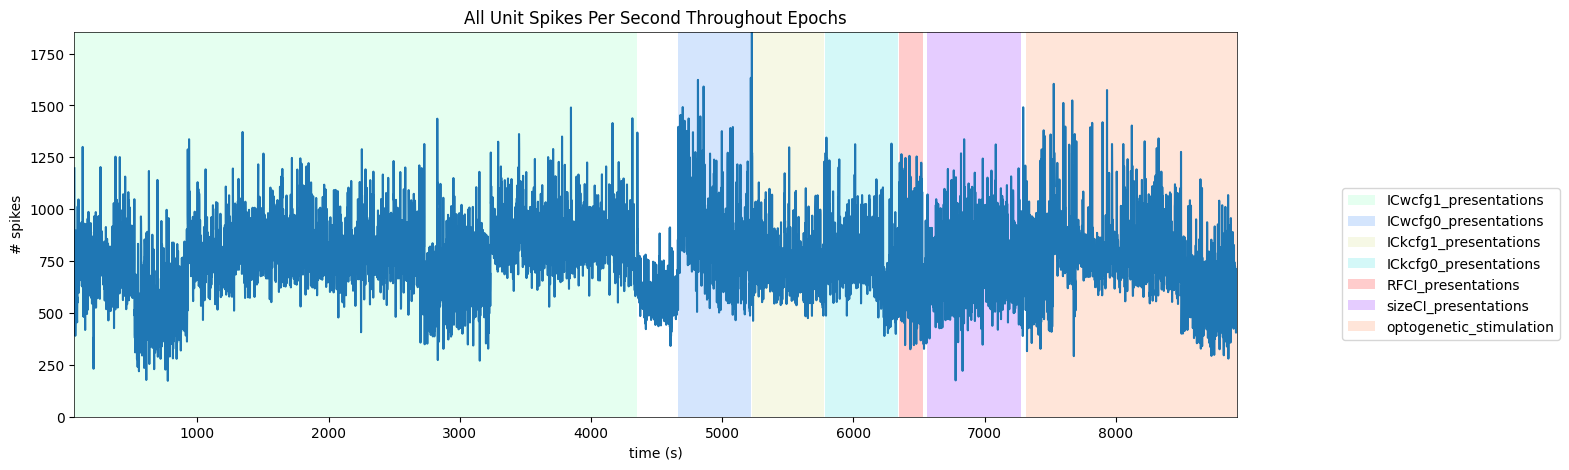

In [17]:
# generate plot of spike histogram with colored epoch intervals and legend
fig, ax = plt.subplots(figsize=(15,5))

# assign unique color to each stimulus name
stim_names = list({epoch[0] for epoch in epochs})
colors = plt.cm.rainbow(np.linspace(0,1,len(stim_names)))
stim_color_map = {stim_names[i]:colors[i] for i in range(len(stim_names))}

epoch_key = {}
height = max(hist)
# draw colored rectangles for each epoch
for epoch in epochs:
    stim_name, stim_block, epoch_start, epoch_end = epoch
    color = stim_color_map[stim_name]
    rec = ax.add_patch(mpl.patches.Rectangle((epoch_start, 0), epoch_end-epoch_start, height, alpha=0.2, facecolor=color))
    epoch_key[stim_name] = rec
    
ax.set_xlim(time_start, time_end)
ax.set_ylim(-0.1, height+0.1)
ax.set_xlabel("time (s)")
ax.set_ylabel("# spikes")
ax.set_title("All Unit Spikes Per Second Throughout Epochs")

fig.legend(epoch_key.values(), epoch_key.keys(), loc="lower right", bbox_to_anchor=(1.12, 0.25))
ax.plot(bins[:-1], hist)

### Extracting Stimulus Times
For this notebook, the first set of Illusory Contour stimulus, `ICkcfg0_presentations` is chosen. Shown below is this set's stimulus table. In order to compare neuronal responses during a frame with an illusory contour and a frame without, the stimulus times following frame 10 and frame 5 are chosen.

In [18]:
nwb.intervals.keys()

dict_keys(['ICkcfg0_presentations', 'ICkcfg1_presentations', 'ICwcfg0_presentations', 'ICwcfg1_presentations', 'RFCI_presentations', 'invalid_times', 'sizeCI_presentations', 'spontaneous_presentations'])

In [19]:
stim_table = nwb.intervals["ICkcfg0_presentations"]
print(stim_table.colnames)
stim_table[:10]

('start_time', 'stop_time', 'stimulus_name', 'stimulus_block', 'frame', 'stimulus_index', 'tags', 'timeseries')


,start_time,stop_time,stimulus_name,stimulus_block,frame,stimulus_index,tags,timeseries
id,,,,,,,,
0,5787.10007,5787.50039,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13484, 1, timestamps pynwb.base.TimeSeries a..."
1,5787.50039,5787.90074,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13485, 1, timestamps pynwb.base.TimeSeries a..."
2,5787.90074,5788.30107,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13486, 1, timestamps pynwb.base.TimeSeries a..."
3,5788.30107,5788.70141,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13487, 1, timestamps pynwb.base.TimeSeries a..."
4,5788.70141,5789.10175,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13488, 1, timestamps pynwb.base.TimeSeries a..."
5,5789.10175,5789.50208,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13489, 1, timestamps pynwb.base.TimeSeries a..."
6,5789.50208,5789.90240,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13490, 1, timestamps pynwb.base.TimeSeries a..."
7,5789.90240,5790.30276,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13491, 1, timestamps pynwb.base.TimeSeries a..."
8,5790.30276,5790.70309,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13492, 1, timestamps pynwb.base.TimeSeries a..."


In [20]:
set(stim_table.stimulus_block)

{3.0}

In [21]:
nwb

root pynwb.file.NWBFile at 0x2480129593104
Fields:
  acquisition: {
    EyeTracking <class 'abc.EllipseEyeTracking'>,
    raw_running_wheel_rotation <class 'pynwb.base.TimeSeries'>,
    running_wheel_signal_voltage <class 'pynwb.base.TimeSeries'>,
    running_wheel_supply_voltage <class 'pynwb.base.TimeSeries'>
  }
  devices: {
    OptogeneticStimulusDevice <class 'pynwb.device.Device'>,
    probeA <class 'abc.EcephysProbe'>,
    probeB <class 'abc.EcephysProbe'>,
    probeC <class 'abc.EcephysProbe'>,
    probeD <class 'abc.EcephysProbe'>,
    probeE <class 'abc.EcephysProbe'>,
    probeF <class 'abc.EcephysProbe'>
  }
  electrode_groups: {
    probeA <class 'abc.EcephysElectrodeGroup'>,
    probeB <class 'abc.EcephysElectrodeGroup'>,
    probeC <class 'abc.EcephysElectrodeGroup'>,
    probeD <class 'abc.EcephysElectrodeGroup'>,
    probeE <class 'abc.EcephysElectrodeGroup'>,
    probeF <class 'abc.EcephysElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  file_create_date: [datetime.datetime(2024, 1, 17, 15, 23, 37, 220999, tzinfo=tzoffset(None, -28800))]
  identifier: 1187930705
  institution: Allen Institute
  intervals: {
    ICkcfg0_presentations <class 'pynwb.epoch.TimeIntervals'>,
    ICkcfg1_presentations <class 'pynwb.epoch.TimeIntervals'>,
    ICwcfg0_presentations <class 'pynwb.epoch.TimeIntervals'>,
    ICwcfg1_presentations <class 'pynwb.epoch.TimeIntervals'>,
    RFCI_presentations <class 'pynwb.epoch.TimeIntervals'>,
    invalid_times <class 'pynwb.epoch.TimeIntervals'>,
    sizeCI_presentations <class 'pynwb.epoch.TimeIntervals'>,
    spontaneous_presentations <class 'pynwb.epoch.TimeIntervals'>
  }
  invalid_times: invalid_times <class 'pynwb.epoch.TimeIntervals'>
  ogen_sites: {
    OptogeneticStimulusSite <class 'pynwb.ogen.OptogeneticStimulusSite'>
  }
  processing: {
    optotagging <class 'pynwb.base.ProcessingModule'>,
    running <class 'pynwb.base.ProcessingModule'>,
    stimulus <class 'pynwb.base.ProcessingModule'>
  }
  session_description: Data and metadata for an Ecephys session
  session_id: 1187930705
  session_start_time: 2022-06-29 00:00:00-07:00
  stimulus_notes: OpenScopeIllusion
  stimulus_template: {
    ICkcfg0_presentations <class 'pynwb.base.Images'>,
    ICkcfg1_presentations <class 'pynwb.base.Images'>,
    ICwcfg0_presentations <class 'pynwb.base.Images'>,
    ICwcfg1_presentations <class 'pynwb.base.Images'>,
    RFCI_presentations <class 'pynwb.base.Images'>,
    sizeCI_presentations <class 'pynwb.base.Images'>
  }
  subject: subject abc.EcephysSpecimen at 0x2480129591136
Fields:
  age: P154D
  age_in_days: 154.0
  genotype: Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
  sex: M
  species: Mus musculus
  specimen_name: 619296
  strain: Transgenic
  subject_id: 619296

  timestamps_reference_time: 2022-06-29 00:00:00-07:00
  units: units <class 'pynwb.misc.Units'>

In [22]:
print(np.mean(np.diff(stim_table.start_time)))
print(set(stim_table.frame))

0.40033660623640277
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0}


In [23]:
illusion_stim_select = lambda row: row.frame.item() == 10.0
illusion_stim_times = [float(stim_table[i].start_time) for i in range(len(stim_table)) if illusion_stim_select(stim_table[i])]
print(len(illusion_stim_times))

control_stim_select = lambda row: row.frame.item() == 5.0
control_stim_times = [float(stim_table[i].start_time) for i in range(len(stim_table)) if control_stim_select(stim_table[i])]
print(len(control_stim_times))

30
30


### Generating Spike Matrix
To analyze the responses to the stimuli chosen, a 3D spike matrix is generated for each array of stimulus times. The matrix has shape `n_units` * `n_trials` * `n_bins`, where `n_bins` is the number of time bins used to count spikes. The parameters `time_resolution`, `window_start_time`, and `window_end_time` below can be adjusted to alter the duration and the bin_size of the resulting matrix.

In [24]:
# bin size for counting spikes
time_resolution = 0.005

# start and end times (relative to the stimulus at 0 seconds) that we want to examine and align spikes to
window_start_time = -0.25
window_end_time = 0.5

In [25]:
def get_spike_matrix(units_spike_times, stim_times, bin_edges, time_resolution):
    n_units = len(units_spike_times)
    n_trials = len(stim_times)

    # 3D spike matrix to be populated with spike counts
    spike_matrix = np.zeros((n_units, n_trials, len(bin_edges)))

    # populate 3D spike matrix for each unit for each stimulus trial by counting spikes into bins
    for unit_idx in range(n_units):
        spike_times = units_spike_times[unit_idx]

        for stim_idx, stim_time in enumerate(stim_times):
            # get spike times that fall within the bin's time range relative to the stim time        
            first_bin_time = stim_time + bin_edges[0]
            last_bin_time = stim_time + bin_edges[-1]
            first_spike_in_range, last_spike_in_range = np.searchsorted(spike_times, [first_bin_time, last_bin_time])
            spike_times_in_range = spike_times[first_spike_in_range:last_spike_in_range]

            # convert spike times into relative time bin indices
            bin_indices = ((spike_times_in_range - (first_bin_time)) / time_resolution).astype(int)
            
            # mark that there is a spike at these bin times for this unit on this stim trial
            for bin_idx in bin_indices:
                spike_matrix[unit_idx, stim_idx, bin_idx] += 1

    return spike_matrix

In [26]:
# time bins used
n_bins = int((window_end_time - window_start_time) / time_resolution)
bin_edges = np.linspace(window_start_time, window_end_time, n_bins, endpoint=True)

# calculate baseline and stimulus interval indices for use later
stimulus_onset_idx = int(-bin_edges[0] / time_resolution)

illusion_spike_matrix = get_spike_matrix(units_spike_times, illusion_stim_times, bin_edges, time_resolution)
control_spike_matrix = get_spike_matrix(units_spike_times, control_stim_times, bin_edges, time_resolution)

print(illusion_spike_matrix.shape)
print(control_spike_matrix.shape)

(165, 30, 150)
(165, 30, 150)


### Showing Response Windows
After generating spike matrices, we can view the PSTHs for each unit.

In [27]:
def show_response(ax, window, window_start_time, window_end_time, aspect="auto", vmin=None, vmax=None, yticklabels=[], skipticks=1, xlabel="Time (s)", ylabel="ROI", cbar=True, cbar_label=None):
    if len(window) == 0:
        print("Input data has length 0; Nothing to display")
        return

    img = ax.imshow(window, aspect=aspect, extent=[window_start_time, window_end_time, 0, len(window)], interpolation="none", vmin=vmin, vmax=vmax)
    if cbar:
        ax.colorbar(img, shrink=0.5, label=cbar_label)

    ax.plot([0,0],[0, len(window)], ":", color="white", linewidth=1.0)

    if len(yticklabels) != 0:
        ax.set_yticks(range(len(yticklabels)))
        ax.set_yticklabels(yticklabels, fontsize=8)

        n_ticks = len(yticklabels[::skipticks])
        ax.yaxis.set_major_locator(plt.MaxNLocator(n_ticks))

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [28]:
def show_many_responses(windows, rows, cols, window_idxs=None, title=None, subplot_title="", xlabel=None, ylabel=None, cbar_label=None, vmin=0, vmax=2):
    if window_idxs is None:
        window_idxs = range(len(windows))
    windows = windows[window_idxs]
    
    # handle case with no input data
    if len(windows) == 0:
        print("Input data has length 0; Nothing to display")
        return
    # handle cases when there aren't enough windows for number of rows
    if len(windows) < rows*cols:
        rows = (len(windows) // cols) + 1

    fig, axes = plt.subplots(rows, cols, figsize=(2*cols+2, 2*rows+2), layout="constrained")
    # handle case when there's only one row
    if len(axes.shape) == 1:
        axes = axes.reshape((1, axes.shape[0]))
    
    for i in range(rows*cols):
        ax_row = int(i // cols)
        ax_col = i % cols
        ax = axes[ax_row][ax_col]
        
        if i > len(windows)-1:
            ax.set_visible(False)
            continue

        window = windows[i]
        show_response(ax, window, window_start_time, window_end_time, xlabel=xlabel, ylabel=ylabel, cbar=False, vmin=vmin, vmax=vmax)
        ax.set_title(f"{subplot_title} {window_idxs[i]}")
        if ax_row != rows-1:
            ax.get_xaxis().set_visible(False)
        if ax_col != 0:
            ax.get_yaxis().set_visible(False)

    fig.suptitle(title)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    colorbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm), ax=axes, shrink=2/cols, label=cbar_label)


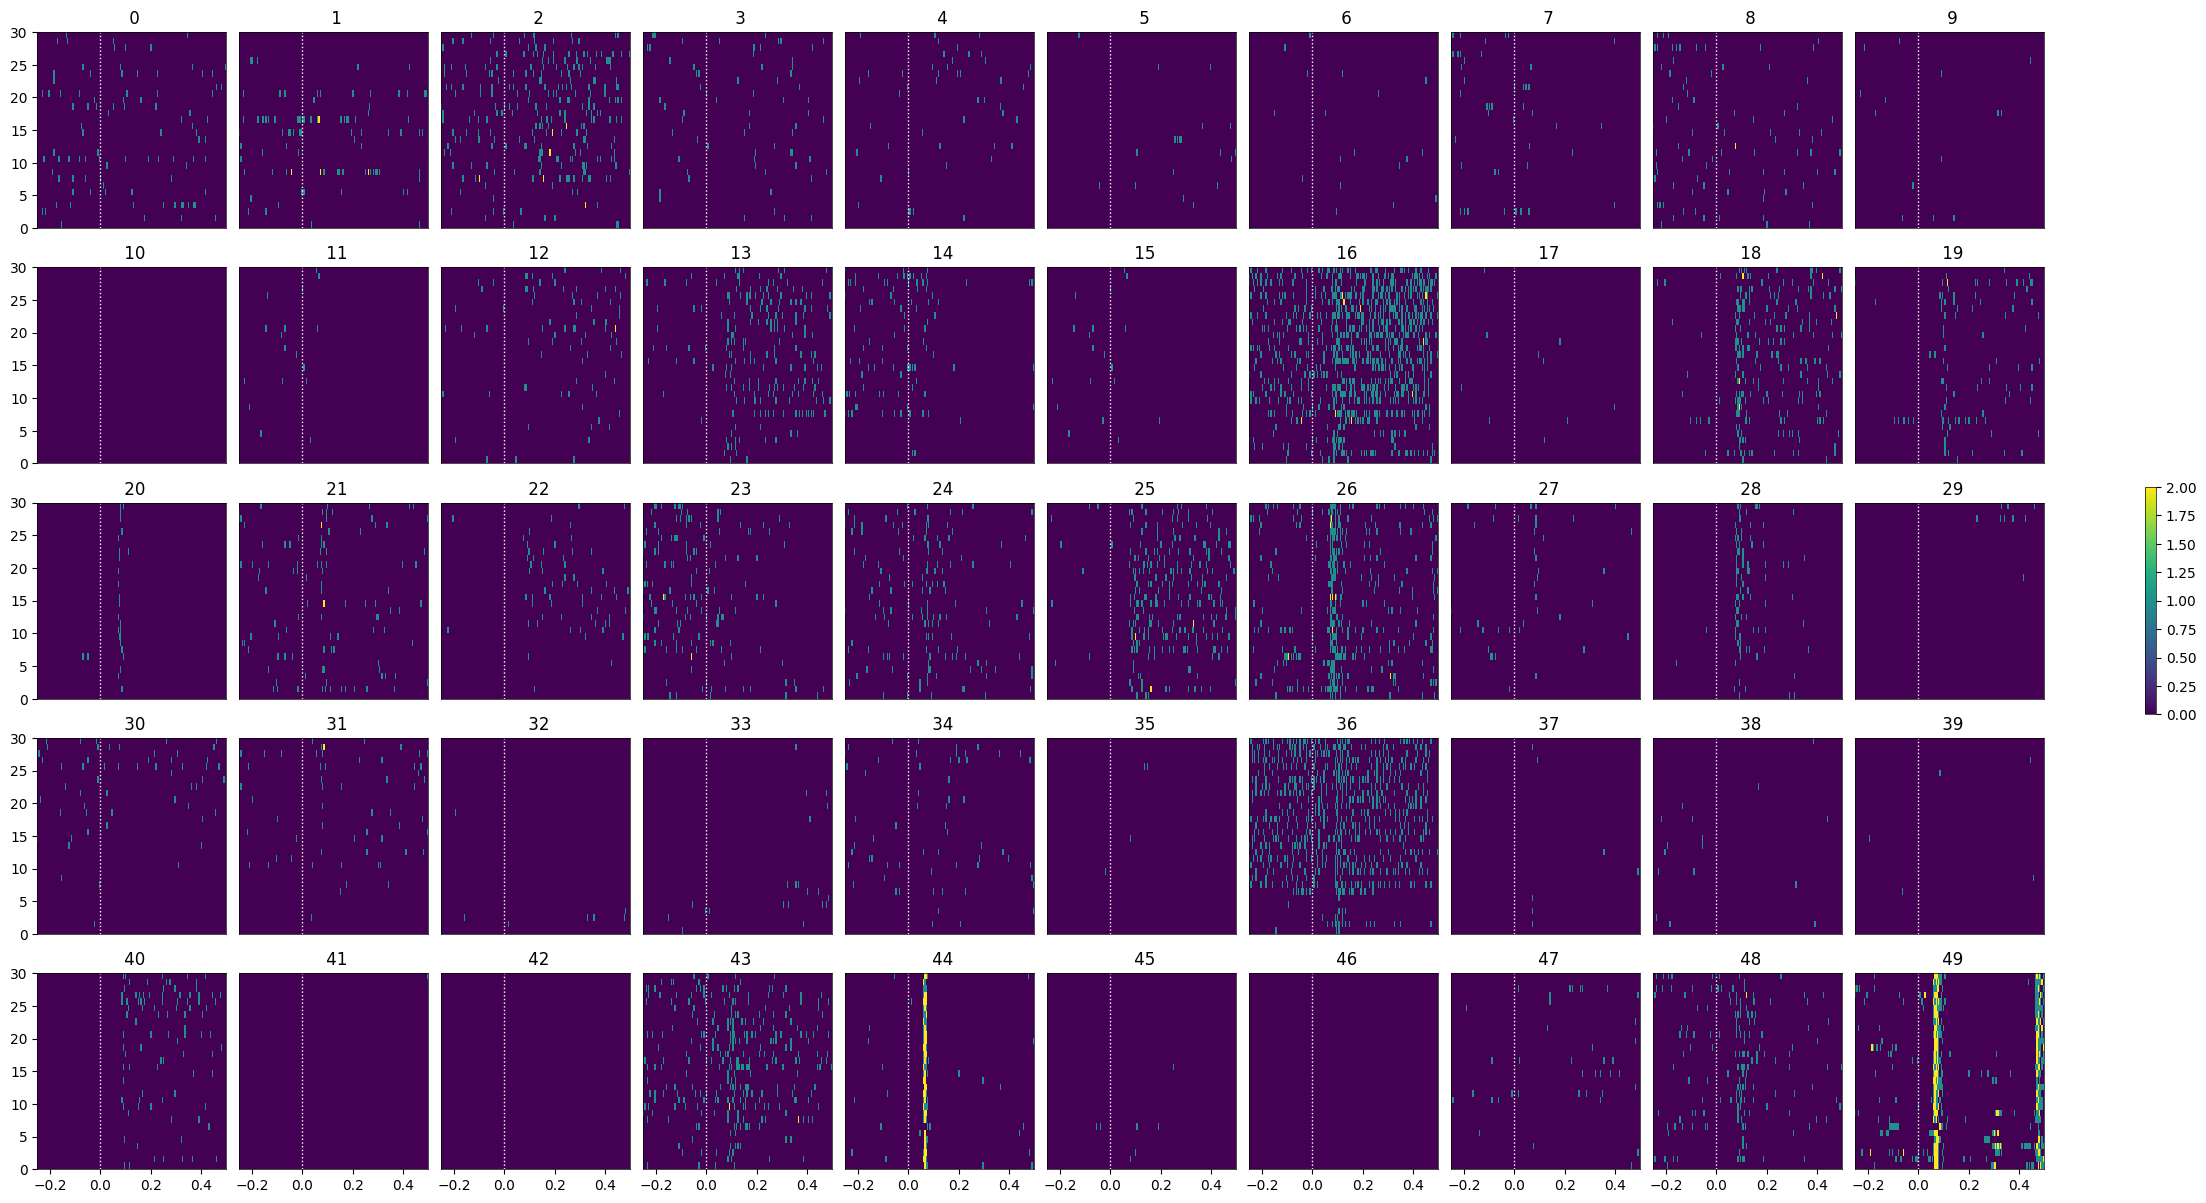

In [29]:
show_many_responses(illusion_spike_matrix, 5, 10)

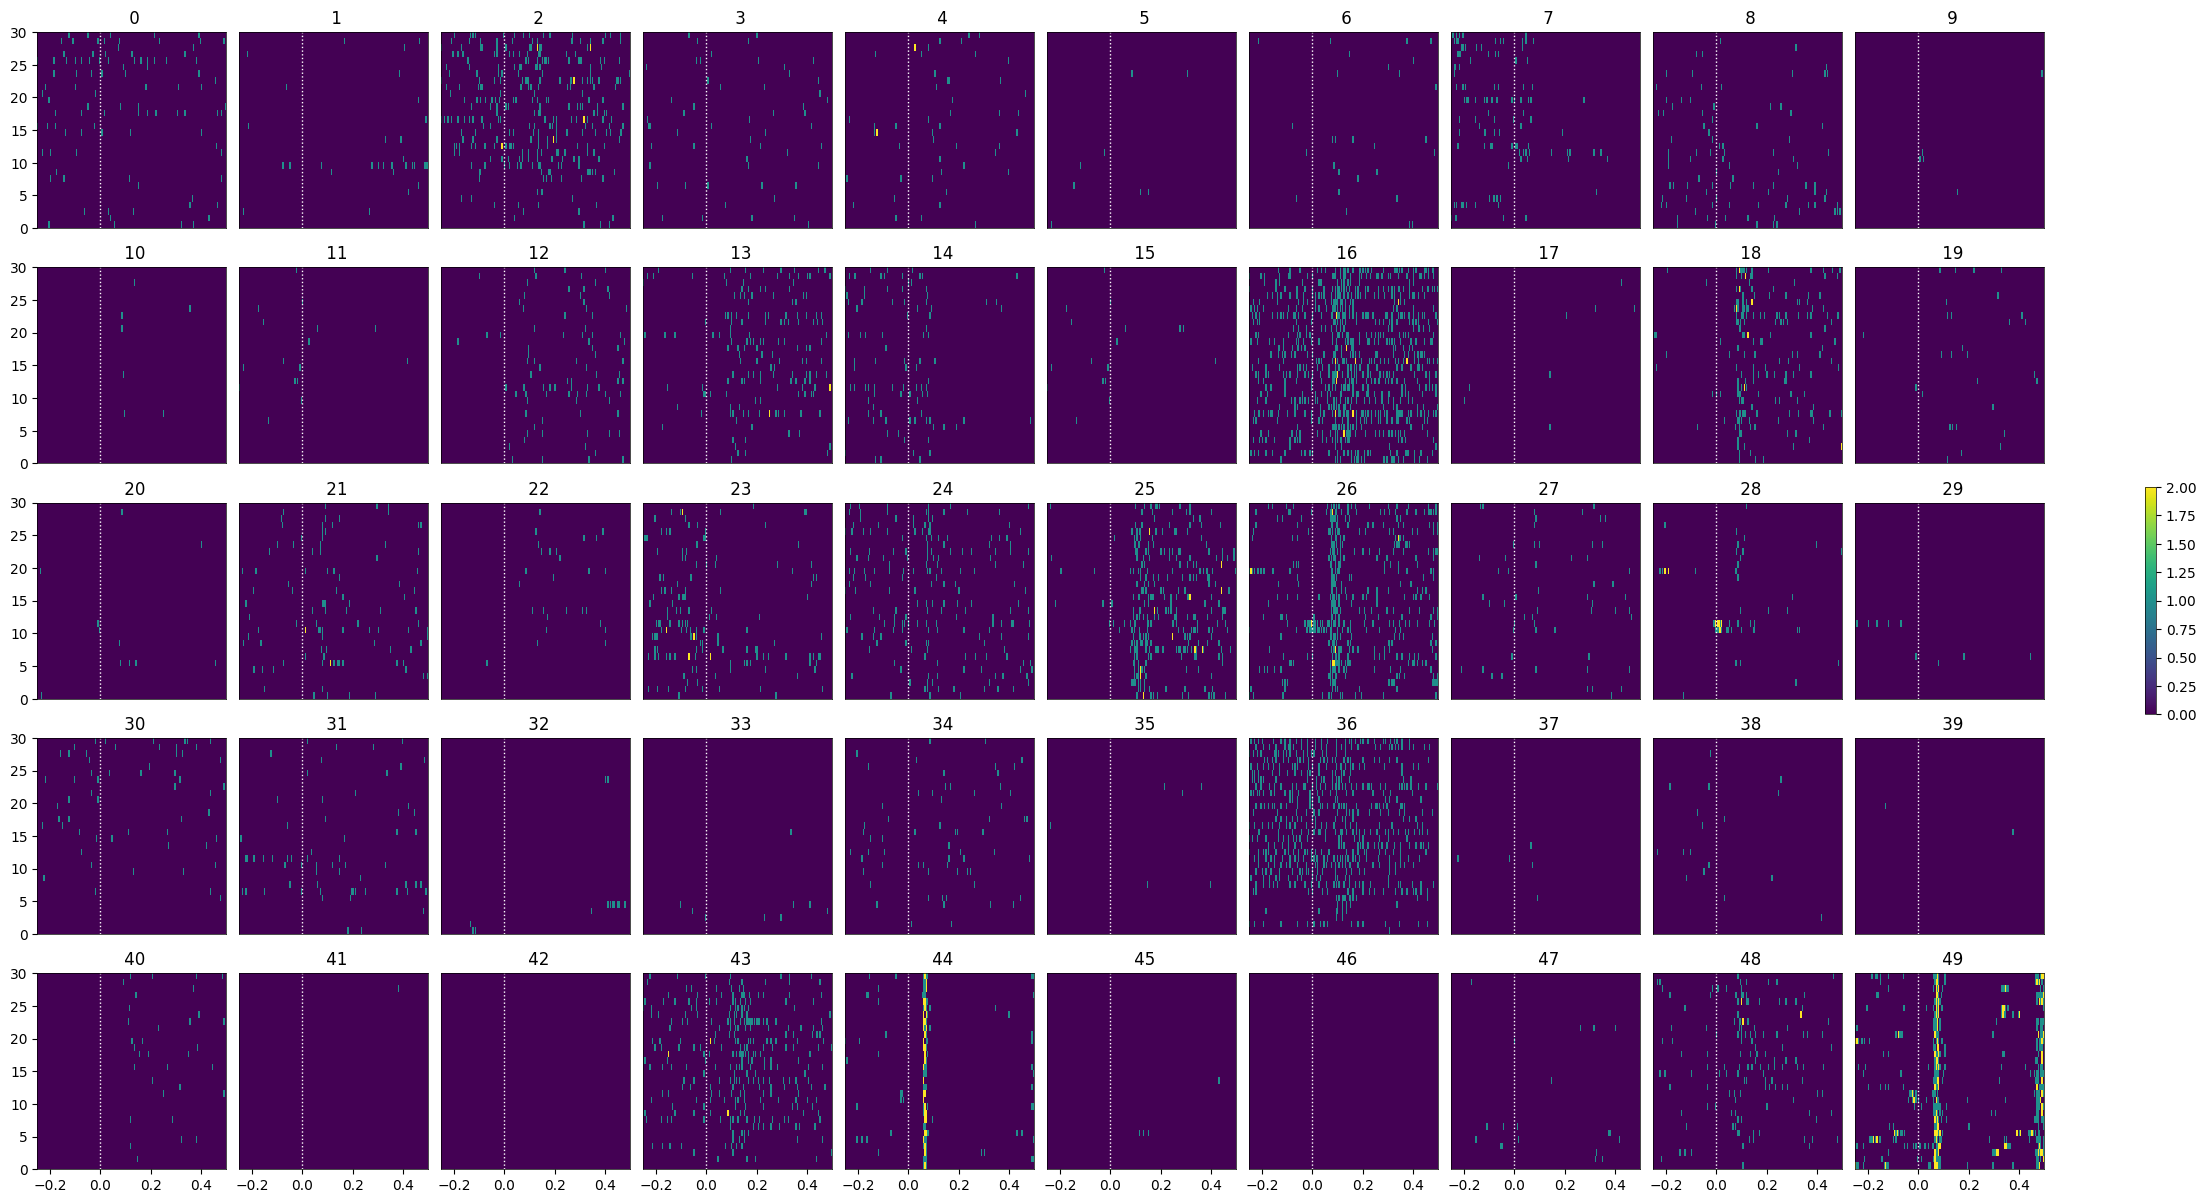

In [30]:
show_many_responses(control_spike_matrix, 5, 10)

### Selecting Responsive Cells
As discussed in [Statistically Testing 2P Responses to Stimulus](../first-order/test_2p_responses.ipynb), the criteria used to select for responsive cells can have a significant impact. Here, the simple criterion is to select units whose post-stimulus z-scores are greater than 2 or less than -2.

In [31]:
def select_cells(spike_matrix, stimulus_onset_idx):
    baseline_means = np.mean(spike_matrix[:,:,:stimulus_onset_idx], axis=2)
    mean_baseline_means = np.mean(baseline_means, axis=1)
    std_baseline_means = np.std(baseline_means, axis=1)

    response_means = np.mean(spike_matrix[:,:,stimulus_onset_idx:], axis=2)
    mean_response_means = np.mean(response_means, axis=1)

    unit_z_scores = (mean_response_means - mean_baseline_means) / std_baseline_means
    return np.where(np.logical_or(unit_z_scores > 2, unit_z_scores < -2))[0]

divide by zero encountered in divide
invalid value encountered in divide


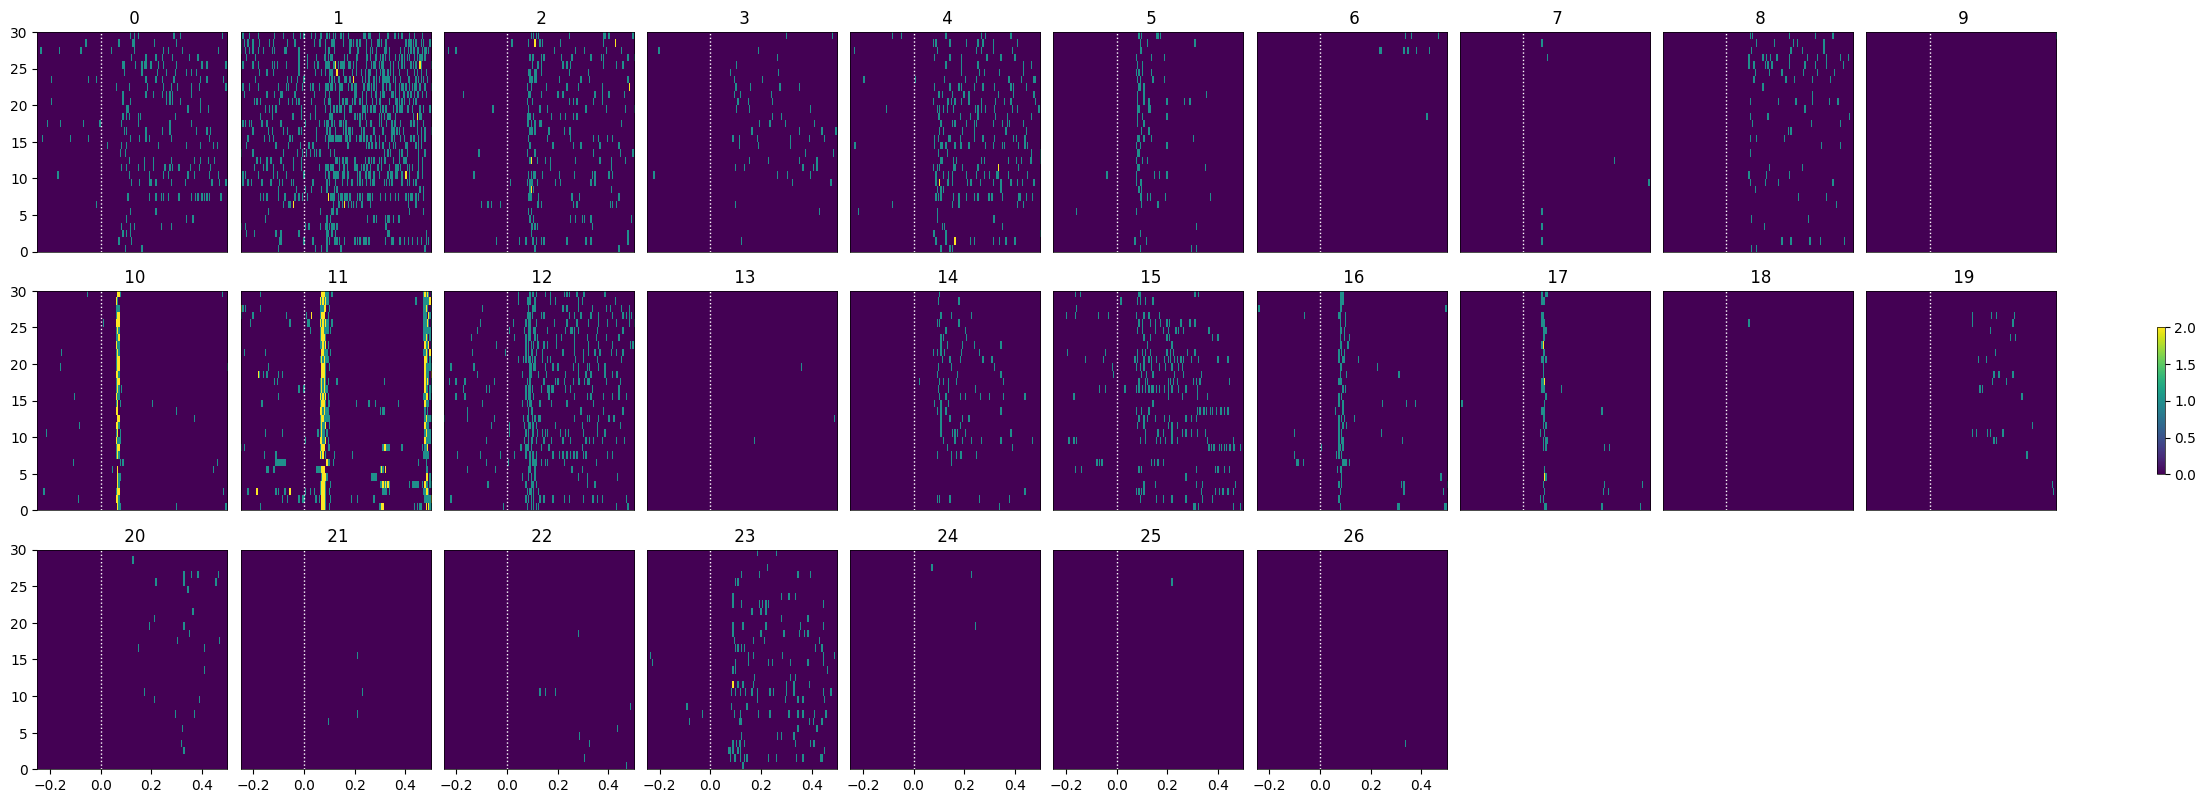

In [32]:
illusion_selected_idxs = select_cells(illusion_spike_matrix, stimulus_onset_idx)
show_many_responses(illusion_spike_matrix[illusion_selected_idxs], 5, 10)

divide by zero encountered in divide
invalid value encountered in divide


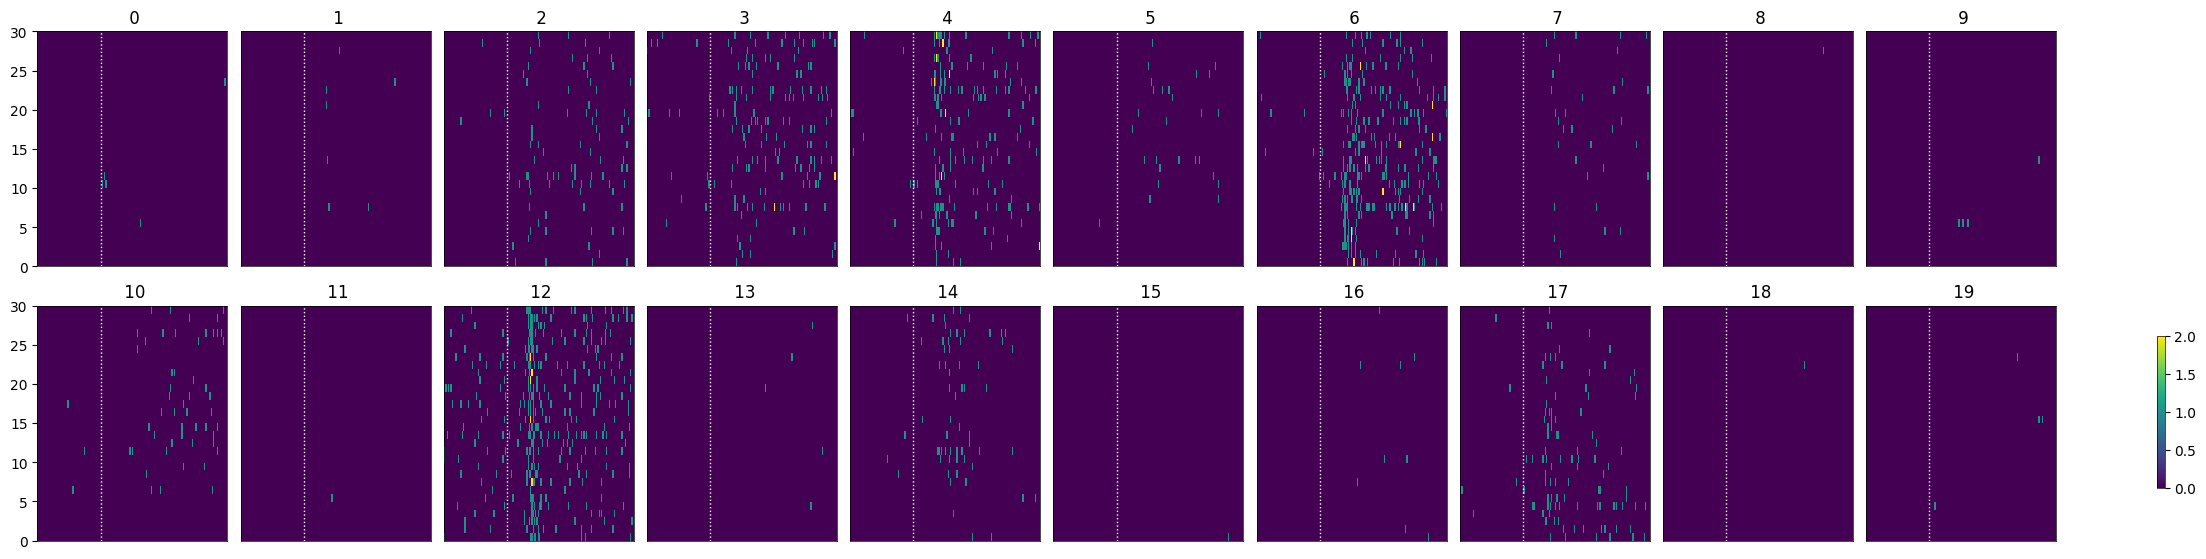

In [33]:
control_selected_idxs = select_cells(control_spike_matrix, stimulus_onset_idx)
show_many_responses(control_spike_matrix[control_selected_idxs], 5, 10)

### Getting Receptive Fields
Because the experiment includes the receptive field, stimulus, can use responses to generate receptive field images for each cell. Below, this is done for each selected cell from the illusion stimulus set and the control stimulus set. After obtaining the list of coordinates that each RF stim occupies, it's shown on one of the templates below for clarity. After this, the receptive fields are generated using its spike times and the stim times for each coordinate.

In [34]:
rf_stim_table = nwb.intervals["RFCI_presentations"].to_dataframe()
rf_stim_table[:10]

,start_time,stop_time,stimulus_name,stimulus_block,stimulus_index,temporal_frequency,Mask,orientation,x_position,y_position,color,contrast,opacity,phase,spatial_frequency,size,units,tags,timeseries
id,,,,,,,,,,,,,,,,,,,
0,6347.62139,6347.87158,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,0.0,-143.810387,143.810387,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14865, 1, timestamps pynwb.base.TimeSeries a..."
1,6347.87158,6348.12180,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,45.0,-143.810387,143.810387,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14866, 1, timestamps pynwb.base.TimeSeries a..."
2,6348.12180,6348.37204,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,90.0,-143.810387,143.810387,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14867, 1, timestamps pynwb.base.TimeSeries a..."
3,6348.37204,6348.63891,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,135.0,-143.810387,143.810387,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14868, 1, timestamps pynwb.base.TimeSeries a..."
4,6348.63891,6348.88910,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,0.0,0.000000,0.000000,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14869, 1, timestamps pynwb.base.TimeSeries a..."
5,6348.88910,6349.13932,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,45.0,0.000000,0.000000,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14870, 1, timestamps pynwb.base.TimeSeries a..."
6,6349.13932,6349.38954,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,90.0,0.000000,0.000000,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14871, 1, timestamps pynwb.base.TimeSeries a..."
7,6349.38954,6349.63972,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,135.0,0.000000,0.000000,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14872, 1, timestamps pynwb.base.TimeSeries a..."
8,6349.63972,6349.88997,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,0.0,-143.810387,-143.810387,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14873, 1, timestamps pynwb.base.TimeSeries a..."


Text(0.5, 1.0, 'Location of receptive field gratings on Screen')

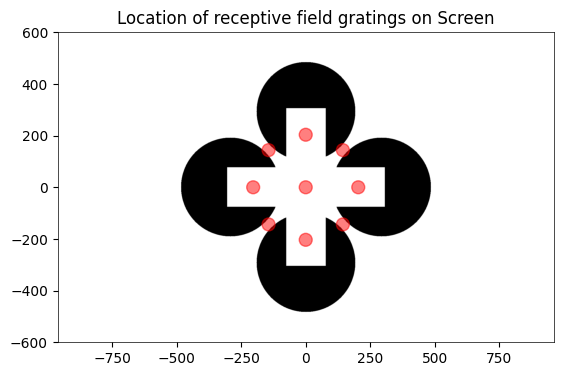

In [35]:
template = nwb.stimulus_template["ICkcfg0_presentations"].images["ICkcfg0_presentations1"]

fig, ax = plt.subplots()
img = ax.imshow(template, cmap="gray", extent=[-template.shape[1]/2., template.shape[1]/2., -template.shape[0]/2., template.shape[0]/2. ])

xcoords, ycoords = rf_stim_table.x_position, rf_stim_table.y_position
xy_pairs = set(zip(xcoords, ycoords))
for x,y in xy_pairs:
    ax.add_patch(mpl.patches.Circle((x, y), radius=25, color="red", alpha=0.5))

ax.set_title("Location of receptive field gratings on Screen")

In [36]:
### get x and y coordinates of gabors displayed to build receptive field

xs = np.sort(list(set(rf_stim_table.x_position)))
ys = np.sort(list(set(rf_stim_table.y_position)))
field_units = rf_stim_table.units[0]
print(xs)
print(ys)
print(field_units)

[-203.3786     -143.81038721    0.          143.81038721  203.3786    ]
[-203.3786     -143.81038721    0.          143.81038721  203.3786    ]
pix


In [37]:
### get receptive field of a unit using its spike times and the stim table

def get_rf(spike_times):
    # creates 2D array that stores response spike counts for each coordinate of the receptive field
    unit_rf = np.zeros([ys.size, xs.size])
    # for every x and y coordinate in the field
    for xi, x in enumerate(xs):
        for yi, y in enumerate(ys):
            
            # for this coordinate of the rf, count all the times that this neuron responds to a stimulus time with a spike
            stim_times = rf_stim_table[(rf_stim_table.x_position == x) & (rf_stim_table.y_position == y)].start_time
            response_spike_count = 0
            for stim_time in stim_times:
                # any spike within 0.2 seconds after stim time is considered a response
                start_idx, end_idx = np.searchsorted(spike_times, [stim_time, stim_time+0.2])
                response_spike_count += end_idx-start_idx

            unit_rf[yi, xi] = response_spike_count
    
    return unit_rf

In [38]:
### compute receptive fields for each unit in selected units

illusion_rfs = []
for idx in illusion_selected_idxs:
    these_spike_times = units_spike_times[idx]
    illusion_rfs.append(get_rf(these_spike_times))

control_rfs = []
for idx in control_selected_idxs:
    these_spike_times = units_spike_times[idx]
    control_rfs.append(get_rf(these_spike_times))

In [39]:
### display the receptive fields for each unit in a 2D plot

def display_rfs(rfs, n_cols=10):
    n_rows = len(rfs) // n_cols
    fig, axes = plt.subplots(n_rows+1, 10)
    fig.set_size_inches(12, n_rows+1)

    # handle case where there's <= n_cols rfs
    if len(axes.shape) == 1:
        axes = axes.reshape((1, axes.shape[0]))

    for irf, rf in enumerate(rfs):
        ax_row = int(irf/10)
        ax_col = irf%10
        axes[ax_row][ax_col].imshow(rf, origin="lower")
    for ax in axes.flat[1:]:
        ax.axis('off')

    # making axis labels for first receptive field
    axes[0][0].set_xlabel(field_units)
    axes[0][0].set_ylabel(field_units)
    axes[0][0].xaxis.set_label_position("top") 
    axes[0][0].xaxis.set_ticks_position("top")
    axes[0][0].set_xticks(range(len(xs)), xs, rotation=90, fontsize=6)
    axes[0][0].set_yticks(range(len(ys)), ys, fontsize=6)
    [l.set_visible(False) for (i,l) in enumerate(axes[0][0].xaxis.get_ticklabels()) if i % 2 != 0]
    [l.set_visible(False) for (i,l) in enumerate(axes[0][0].yaxis.get_ticklabels()) if i % 2 != 0]


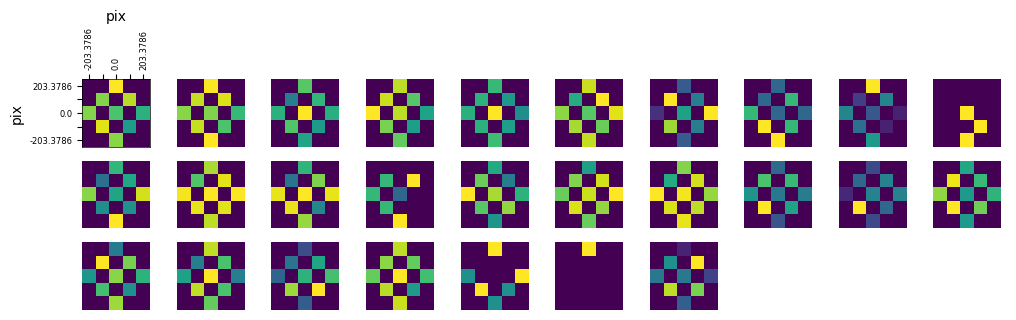

In [40]:
display_rfs(illusion_rfs)

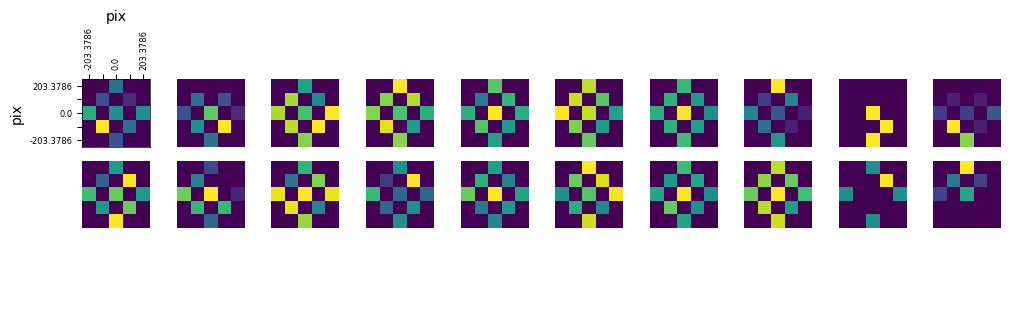

In [41]:
display_rfs(control_rfs)

### Optotagging
As mentioned earlier, the final epoch of the sessions is optotagging. The principles behind the optotagging are discussed in the [Identifying Optotagged Units](../first-order/optotagging.ipynb) notebook.

In [42]:
opto_stim_table = nwb.processing["optotagging"]["optogenetic_stimulation"]
opto_stim_table[:20]

,start_time,condition,level,stop_time,stimulus_name,duration,tags,timeseries
id,,,,,,,,
0,7314.15612,a single 20hz pulse,1.4,7314.20612,20_hz,0.0500,[optical_stimulation],"[(0, 1, optotagging pynwb.ogen.OptogeneticSeri..."
1,7316.85601,a single 80hz pulse,1.4,7316.86851,80hz,0.0125,[optical_stimulation],"[(1, 1, optotagging pynwb.ogen.OptogeneticSeri..."
2,7319.80562,a single 80hz pulse,1.4,7319.81812,80hz,0.0125,[optical_stimulation],"[(2, 1, optotagging pynwb.ogen.OptogeneticSeri..."
3,7322.14556,a single 5hz pulse,1.4,7322.34556,5_hz,0.2000,[optical_stimulation],"[(3, 1, optotagging pynwb.ogen.OptogeneticSeri..."
4,7325.10525,a single 5hz pulse,1.4,7325.30525,5_hz,0.2000,[optical_stimulation],"[(4, 1, optotagging pynwb.ogen.OptogeneticSeri..."
5,7328.10497,cosine pulse,1.4,7329.10497,cosine,1.0000,[optical_stimulation],"[(5, 1, optotagging pynwb.ogen.OptogeneticSeri..."
6,7331.20473,a single 80hz pulse,1.4,7331.21723,80hz,0.0125,[optical_stimulation],"[(6, 1, optotagging pynwb.ogen.OptogeneticSeri..."
7,7333.65456,1 second square pulse: continuously on for 1s,1.4,7334.65456,Square Pulse,1.0000,[optical_stimulation],"[(7, 1, optotagging pynwb.ogen.OptogeneticSeri..."
8,7336.71431,A single 50hz pulse,1.4,7336.73431,50hz,0.0200,[optical_stimulation],"[(8, 1, optotagging pynwb.ogen.OptogeneticSeri..."


In [43]:
opto_stim_times = [float(row.start_time) for row in opto_stim_table if isclose(float(row.duration), 1.0)]

In [44]:
len(units_spike_times)

165

In [45]:
# bin size for counting spikes
time_resolution = 0.005

# start and end times (relative to the stimulus at 0 seconds) that we want to examine and align spikes to
window_start_time = -0.25
window_end_time = 0.5

In [46]:
# time bins used
n_bins = int((window_end_time - window_start_time) / time_resolution)
bin_edges = np.linspace(window_start_time, window_end_time, n_bins, endpoint=True)

# calculate baseline and stimulus interval indices for use later
stimulus_onset_idx = int(-bin_edges[0] / time_resolution)

opto_spike_matrix = get_spike_matrix(units_spike_times, opto_stim_times, bin_edges, time_resolution)

print(opto_spike_matrix.shape)

(165, 100, 150)


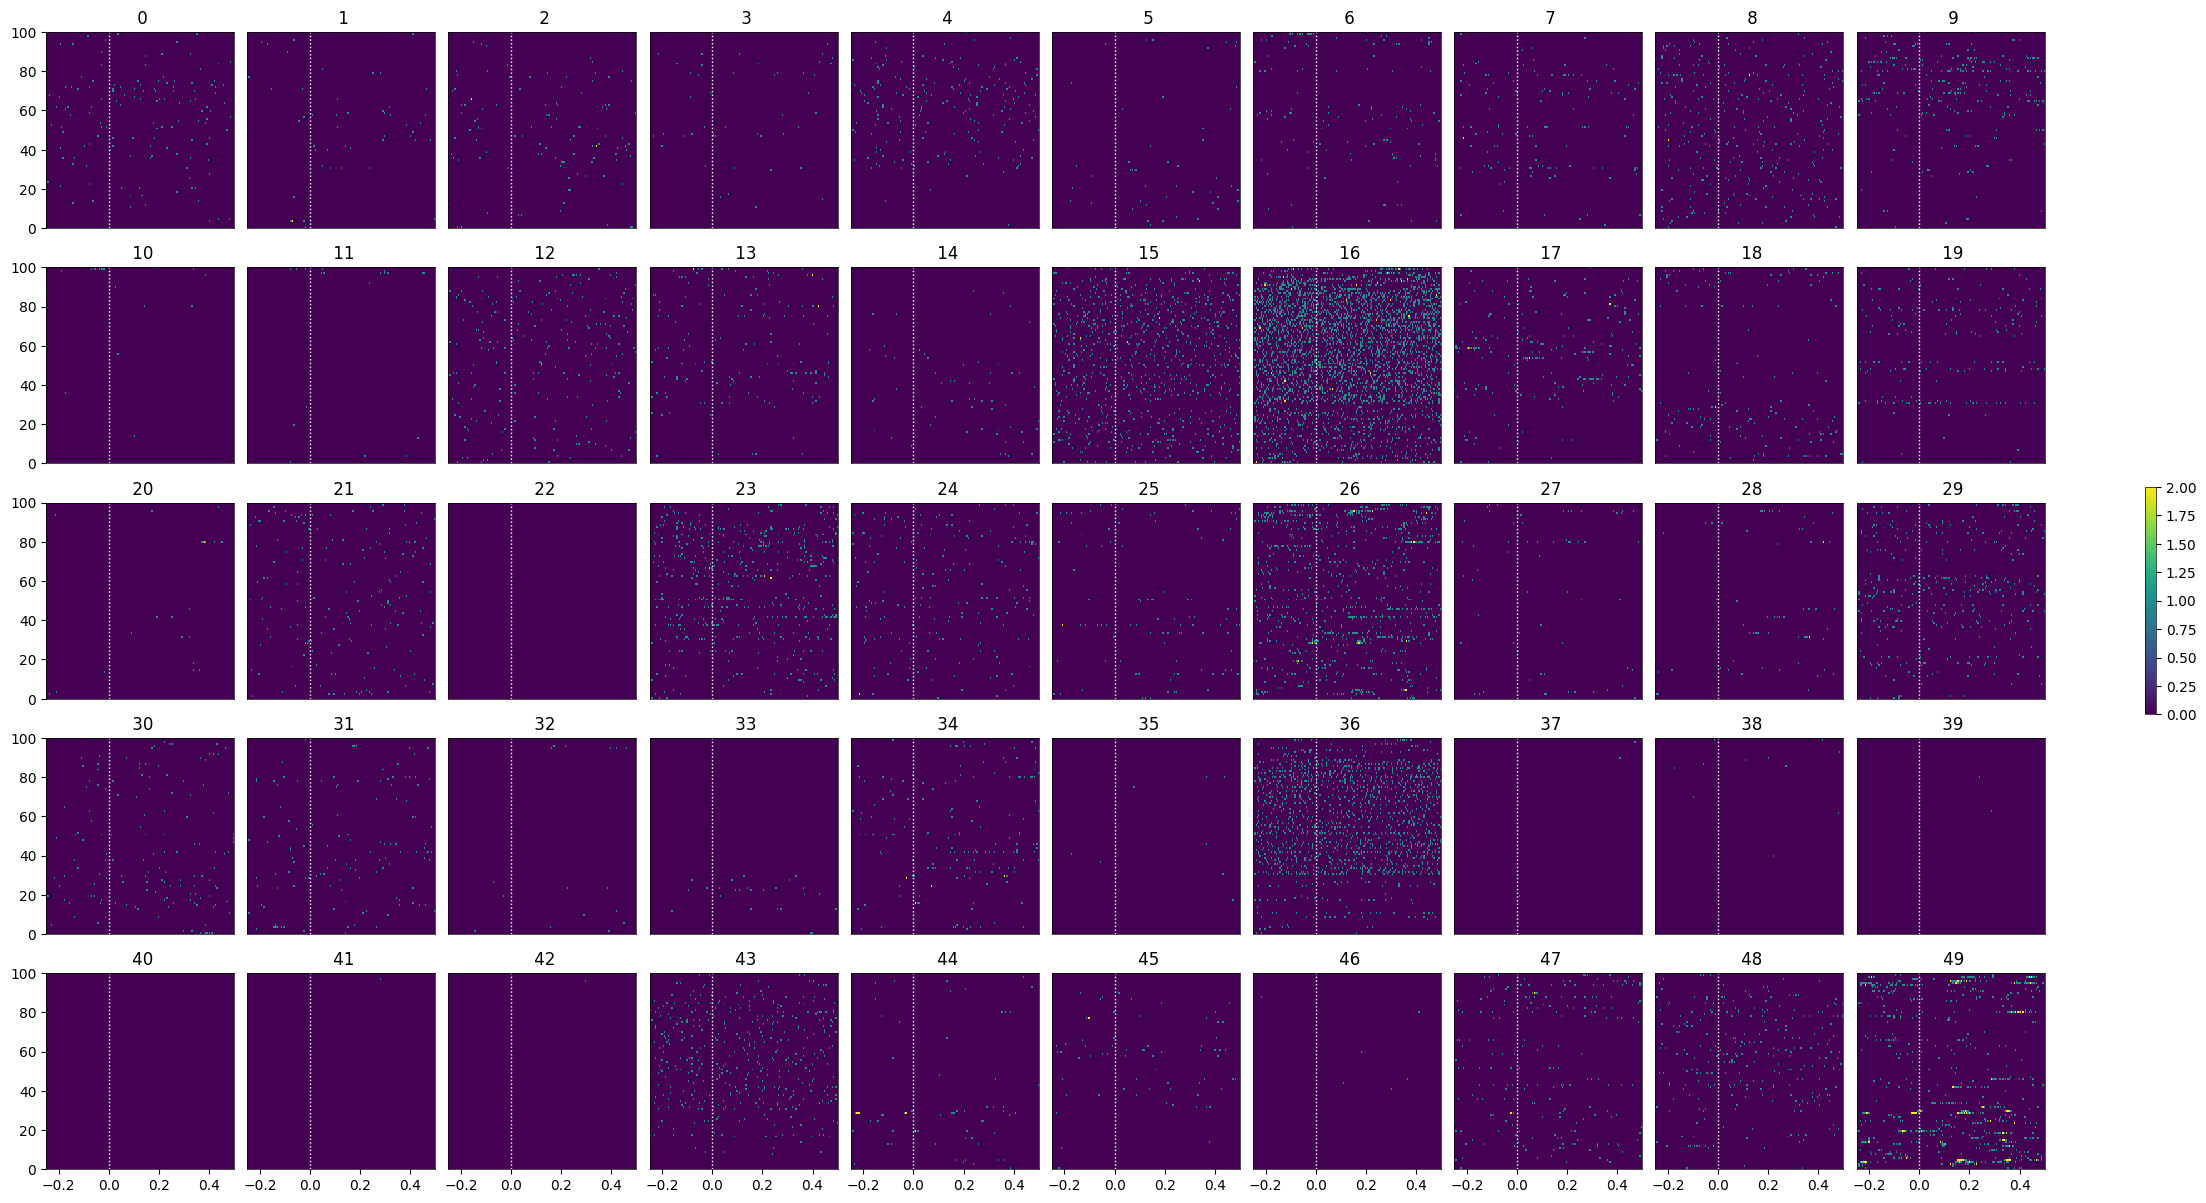

In [47]:
show_many_responses(opto_spike_matrix, 5, 10)

divide by zero encountered in divide
invalid value encountered in divide


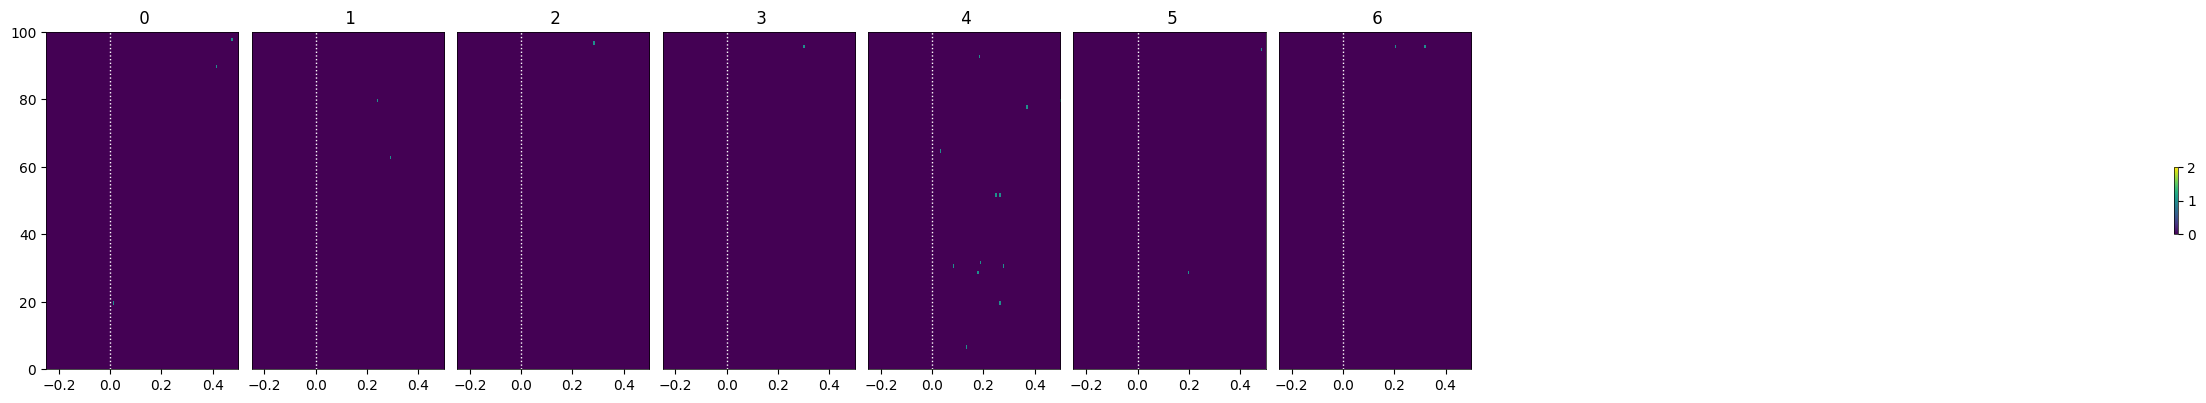

In [48]:
opto_selected_idxs = select_cells(opto_spike_matrix, stimulus_onset_idx)
show_many_responses(opto_spike_matrix[opto_selected_idxs], 5, 10)

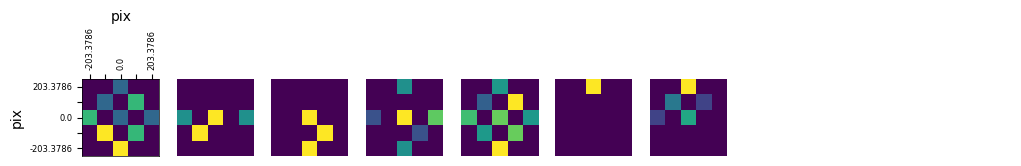

In [49]:
opto_rfs = []
for idx in opto_selected_idxs:
    these_spike_times = units_spike_times[idx]
    opto_rfs.append(get_rf(these_spike_times))

display_rfs(opto_rfs)